Text(0, 0.5, 'PDF')

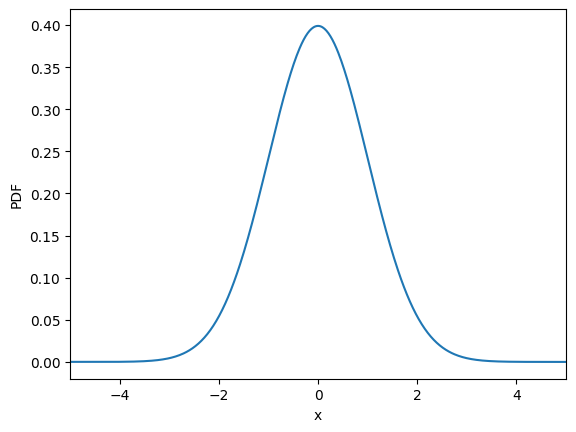

In [70]:
import pandas as pd
import numpy as np
import scipy as st
import matplotlib.pyplot as plt
import scipy.interpolate as interpolate


# specifications of normmal distribution

i = complex(0,1)
mu = 0
sigma = 1 
u_max = 20
n = 2**13
du = u_max/n
u = np.linspace(0,n-1,n) * du

CF = np.exp(i*mu*u)*np.exp(-0.5*sigma**2*u**2) # CF of normal distribution

def densityfx(CF, x, n):
    
    dx = 2*np.pi/(n*du)
    
    x_min = np.min(x)
    
    xi = x_min + np.linspace(0, n-1, n) * dx  # equating the number of 'x' with number of 'u'.
    
    gamma_u1 = np.exp(-i*xi*u[0]) * CF[0]
    
    gamma_un = np.exp(-i*xi*u[-1]) * CF[-1]
    
    gamma_u = np.exp(-complex(0,1)*u*x_min) * CF
    
    f_x = (du/np.pi)*np.real(st.fft.fft(gamma_u) - 0.5*(gamma_u1 + gamma_un))
    
    f_xInterp = interpolate.interp1d(xi,f_x, kind='cubic')
    
    return f_xInterp(x)   #return interpolated PDF over 'x' 

x = np.linspace(-10, 10, 1000)

k = densityfx(CF, x, 2**13)


plt.xlim(-5,5)
plt.plot(x,k)
plt.xlabel('x')
plt.ylabel('PDF')